In [109]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [110]:
df = pd.read_csv('House_Rent_Dataset.csv')

In [111]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


we are going perdict rent based on size

In [112]:
df = df.dropna() #we droping null  valued row

In [134]:
x = np.array(df['Size'])
y = np.array(df['Rent'])

x = (x-np.min(x))/(np.max(x)-np.min(x))
y = (y-np.min(y))/(np.max(y)-np.min(y))


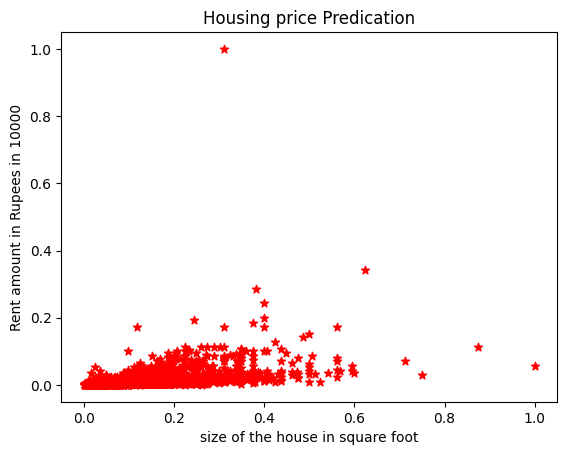

In [117]:
plt.title('Housing price Predication')
plt.xlabel('size of the house in square foot')
plt.ylabel('Rent amount in Rupees in 10000')
plt.scatter(x_train,y_train,marker = '*',c='r')


model function

In [118]:
#setting w and b value
w = 0.12662066381815684
b = 0.0017944134132060752
print(f'w:{w}')
print(f'b:{b}')


w:0.12662066381815684
b:0.0017944134132060752


In [119]:

#shape of the x_train and y_train

shape_x = x_train.shape
shape_y = y_train.shape

print(f'shape of features:{shape_x[0]}')
print(f'shape of target:{shape_y[0]}')

shape of features:4746
shape of target:4746


In [120]:
def model(w,b,x_train,shape_x):
    Y = np.zeros(shape_x[0])
    for i in range(shape_x[0]):
        Y[i]= w*x_train[i]+b

    return Y
    

In [121]:
Y = model(w,b,x_train,shape_x) 

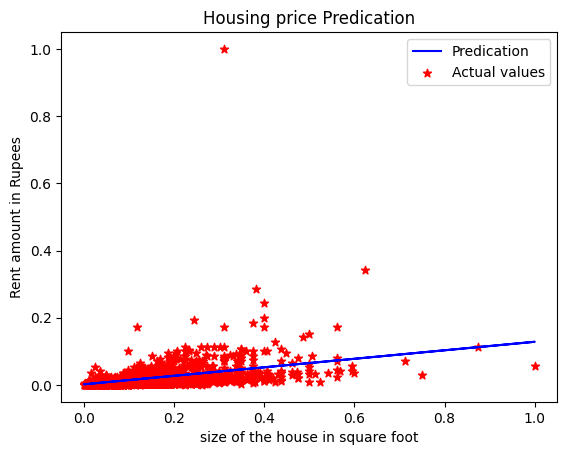

In [122]:
plt.title('Housing price Predication')
plt.xlabel('size of the house in square foot')
plt.ylabel('Rent amount in Rupees')
plt.plot(x_train,Y,c='b',label = 'Predication')
plt.scatter(x_train,y_train,marker = '*',c='r',label = 'Actual values')
plt.legend()
plt.show()

In [135]:
def calculate_cost(Y, y_train, shape_x):
    costs = np.zeros(shape_x[0])
    costs  = (Y - y_train)** 2
    cost = np.sum(costs)
    cost = cost / (2 * shape_x[0])
    return cost


        
        
    

Randomly get W and b

In [124]:
cost = calculate_cost(Y,y_train,shape_x)
cost

0.00023356653602465743

In [125]:
d = pd.DataFrame(columns=['w', 'b', 'cost'])
error =[]
W_list =[]
b_list =[]
for i in range(10000):
    w = np.random.rand()*np.random.randint(1,25)
    b = np.random.rand()*np.random.randint(1,25)
    Ypred = model(w,b,x_train,shape_x)
    cost1 = calculate_cost(Ypred,y_train,shape_x)
    error.append(cost1)
    W_list.append(w)
    b_list.append(b)

dict ={}
dict['W'] = W_list
dict['b'] = b_list
dict['cost'] = error

Dcost = pd.DataFrame(dict)
    

In [126]:
Dcost.head()

,W,b,cost
0,1.071290,7.860373,31.836044
1,0.245428,4.091585,8.451807
2,0.016268,0.580408,0.164230
3,12.892556,4.571283,19.159701
4,14.002726,2.571130,9.594229


In [127]:
 min_cost = np.min(Dcost['cost'])

In [128]:
i = list(Dcost['cost']).index(min_cost)

w = Dcost['W'][i]
b = Dcost['b'][i]
        

In [129]:
#prameter w and b

W = w*100
B = b*100

In [130]:
print(f'W:{W} and B:{B}')

W:2.5640769542478736 and B:0.8105469110592067


In [136]:
def pdw(ypred,y,shape_x,x):
    p = np.zeros(shape_x[0])
    p=(ypred - y)*x
    pw = np.sum(p)/shape_x[0]
    return pw

def pdb(ypred,y,shape_x):
    p = np.zeros(shape_x[0])
    p =ypred- y
    return np.sum(p)/shape_x[0]


        
        

In [137]:
def Gradient(x,y,shape_x,a):
    W = 0
    B =0
    for i in range(1000):
        ypred = model(W,B,x,shape_x)
        J = calculate_cost(ypred,y,shape_x)
        pw = pdw(ypred,y,shape_x,x)
        W = W - a*pw
        ypred = model(W,B,x,shape_x)
        J = calculate_cost(ypred,y,shape_x)
        pb = pdb(ypred,y,shape_x)
        B = B - a*pb

    return W,B
    











In [138]:
W,B = Gradient(x,y,shape_x,0.01)

In [141]:
W*100

0.809209915433984

In [142]:
B*100

0.8768721587415292

In [143]:
ypred = model(W,B,x,shape_x)



0.00024340378553341086
